<a href="#Overview"></a>
# Overview
* <a href="#cd830e57-02c0-48a1-aa8d-54c62e63eada">Analyzing Messy Fiber Photometry Data</a>
  * <a href="#acf82cf0-ee3d-49c2-94f5-7335cc1932f5">Getting Started</a>
    * <a href="#9d5acbad-7074-49e7-a3f0-7fe4aa741dfa">Exercise 1</a>
  * <a href="#d43d1e91-8f1f-41f6-b593-673a93b06d65">Reading in the Data</a>
    * <a href="#ca197c9b-d2ce-4753-92b7-4219da7e9332">Exercise 2</a>
    * <a href="#efd53850-671c-49f5-ac5e-27a80d075086">Exercise 3</a>
    * <a href="#ac325c6e-fa90-46cf-8cc4-e1a388b4f117">Exercise 4</a>
    * <a href="#77ad73cc-038d-41bd-b127-c27999e3a1a3">Exercise 5</a>
    * <a href="#60f4326d-d72f-4254-90d6-e936a6b4ab15">Exercise 6</a>
  * <a href="#f2b98460-c46b-4f52-bc8f-b761d8ebbd3a">Looking at the Data</a>
    * <a href="#eb2182fb-8b18-41d8-96b2-67f5c637423a">Exercise 7</a>
  * <a href="#eeb02ac0-97ee-4e7a-9bd5-2e1e69bf55f1">Fitting a Regression</a>
    * <a href="#de617023-789a-4d14-96a0-e1433600da20">Exercise 8</a>
    * <a href="#62e4f653-b462-4873-ac38-077c3e35fbca">Exercise 9</a>
    * <a href="#5ab4111f-54d3-4b25-acf1-bace4e05517e">Exercise 10</a>
  * <a href="#53674af2-feb5-426b-80f9-bc2231446c77">Looping your way to better fits</a>
    * <a href="#f3cf81b3-9ad7-4a62-ab10-8bcc8d494950">Exercise 11</a>
    * <a href="#df8141d6-9cff-44ea-891b-bc3a0ebfdfce">Exercise 12</a>
  * <a href="#45692567-2654-47a5-82d8-59f1bf34ddc8">Calculating Delta F/F</a>
    * <a href="#b7a2a5c2-b0a2-454a-bd3b-05a4e296b5ab">Exercise 13</a>
  * <a href="#5f3b411e-e0bb-4ee0-a5ce-904831bb9a7a">Removing Problematic Data</a>
    * <a href="#71ea59e2-f827-46fa-a754-cac54d2f0a5a">Exercise 14</a>
  * <a href="#d127b290-0555-4a38-9a29-cb8b65c9f2a4">Part II: Analyzing Our Data By Finding Peaks</a>
    * <a href="#f9da1031-f163-4672-b2f5-739abd15312b">Exercise 15</a>
    * <a href="#d6c1e911-21a8-48b9-866a-af49c431501b">Exercise 16</a>
    * <a href="#502e77bc-af04-40e6-a278-0a55798f0fb2">Exercise 17</a>
  * <a href="#6b89bd70-f62b-466c-a761-6eb3570d321e">Writing Out Our Data</a>
    * <a href="#161b7456-37ee-4195-bdc7-addaae4713d9">Exercise 18</a>
    * <a href="#0d8e3f87-8108-4d13-a0f1-c4262395ca81">Exercise 19</a>

<a id="cd830e57-02c0-48a1-aa8d-54c62e63eada"></a>
# Analyzing Messy Fiber Photometry Data
<a href="#Overview">Return to overview</a>


Fiber Photmetry is a method for recording *in vivo* calcium activity. Basically some calcium indicator (usually GCaMP) is expressed in cells and an optic fiber is placed near these cells to pick up calcium related activity. Things can get messy however. Animals love to move around and cause problems, this can effect the quality of the signal and in worse cases the animal may knock the connecting fiber (patchcord) off their head making the signal useless. For this reason some amount of quality control and normalization is needed. Today we will go through a pretty messy data file to find ways to process the data and quantify fiber photometry signal. 

<a id="acf82cf0-ee3d-49c2-94f5-7335cc1932f5"></a>
## Getting Started
<a href="#Overview">Return to overview</a>


In [ ]:
import csv
import math
import numpy as np
import scipy as sp
import scipy.signal
import matplotlib.pyplot as plt

Sometimes you need to write code for other people to use. In times like these it helps to make your code a bit more interactive. One way of doing this is the `input` option in Python. It will allow you to prompt the user to type in something like a file name or a threshold for analysis. 

Try it. Use input to prompt someone to type into the command line. What does it return? What format is it in?

In [ ]:
# Answer
user_input = input('Type Something!')
print(user_input)
print(type(user_input))

<a id="9d5acbad-7074-49e7-a3f0-7fe4aa741dfa"></a>
### Exercise 1
<a href="#Overview">Return to overview</a>
Ok lets do it again but this time with a file name. Prompt someoneone to "Enter File name:". And save their input as `datafile`. The file name we need is `green1.npy`.

In [ ]:
# Answer
datafile = input("Enter File name:")

<a id="d43d1e91-8f1f-41f6-b593-673a93b06d65"></a>
## Reading in the Data
<a href="#Overview">Return to overview</a>

<a id="ca197c9b-d2ce-4753-92b7-4219da7e9332"></a>
### Exercise 2
<a href="#Overview">Return to overview</a>
The data you need is saved as a Numpy format. You can use `np.load` to read in the data from the file specified by `datafile` and save it as `green1_raw`.

In [ ]:
# Answer
green1_raw = np.load(datafile) 

What's the datatype of `green1_raw`? What's the shape?

In [ ]:
# Answer
print(type(green1_raw))
print(green1_raw.shape)

Woah 3 mil data points. Pretty cool. These data are sampled at about 1000 Hz and the session is about an hour long, so that makes sense. Sometimes you don't need that much resolution and its faster to just downsample the data to something more manageable. One such way is to just take the mean of adjacent data points. Below, we've made an array, `a`, with 8 samples. Let's say we want to average every two adjacent samples together so the resulting array is only 4 samples long. The simplest way to do this is to first `reshape` our 1D array, `a` into a 2D array with four rows and two columns. Save the reshaped array as `ar`. If you did it successfully, you'll see the following output when you `print(ar)`:

    [[3 5]
     [4 6]
     [5 7]
     [6 8]]

In [ ]:
a = np.array([3, 5, 4, 6, 5, 7, 6, 8])

# Answer
ar = a.reshape((4, 2))
print(ar)

Take a good look at the reshaped array. Look at the relationship of the samples to each other. We went from:

    a b c d e f g h
    
to:

    a b
    c d
    e f
    g h

This makes it easy to average the adjacent two datapoints. So, now we compute the row-wise means. Arrays have *axes*, one axis for each dimension. A 1D array has a single axis. How many axes does `ar` have? In Numpy, these axes are numbered. The first dimension (rows) is axis 0. The second dimension (columns) is axis 1. Arrays allow us to take means along a particular axis using `np.mean` or `ar.mean` (i.e., we can either use a function available in the `numpy` module or the method available on the array object). Either is fine and usage is typically personal preference. The function or method takes an optional argument, `axis`, that allows us to specify which axis to average across. 

How do we specify which axis to average across. The simplest way is to think about which dimension we want to disappear when we're done with the averaging. Our array currently has shape `(4, 2)`. We want the final array to have shape `(4,)`. This means we want the second dimension (with two elements) to disappear. What's the index of this dimension? That's the axis number you pass to `np.mean` or `ar.mean`.  If you're successful, you'll get:

    [4., 5., 6., 7.]

In [ ]:
# Answer
print(ar.mean(axis=1))

<a id="efd53850-671c-49f5-ac5e-27a80d075086"></a>
### Exercise 3
<a href="#Overview">Return to overview</a>

Alright lets do this downsampling with the `green1` data. We want to average together every 16 samples. How many columns should our reshaped array have? How many rows? Once you finish reshaping and averaging, your resulting array, `green1`, should have a shape of `(213168,)`.

In [ ]:
# Answer
cols = 16
rows = int(len(green1_raw) / 16)
green1_reshaped = green1_raw.reshape((rows, cols))
green1 = green1_reshaped.mean(axis=1)
green1.shape

Great. We have our GCaMP data now. In fiber photmetry we also (usually) have a control signal that is a different wavelength of light that the florophore is sensitive to but it is NOT calcium dependent. As such this signal is meant to correct for motion artifact that arises from moving of the fiber connection and for photobleaching of the GFP. 

<a id="ac325c6e-fa90-46cf-8cc4-e1a388b4f117"></a>
### Exercise 4
<a href="#Overview">Return to overview</a>
This data is saved in `iso1.npy`. Load it and downsample by averaging every 16 samples together. Once you're done, `iso1` should have the same shape as `green1` (i.e., `(213168,)`.

In [ ]:
# Answer
iso1_raw = np.load('iso1.npy')
iso1_reshaped = iso1_raw.reshape((rows, cols))
iso1 = iso1_reshaped.mean(axis=1)
iso1.shape

Alright one more thing. We need to calculate a time vector. The sampling rate of our **raw** data is 1017.25 Hz. That means the equipment acquires a sample every 0.98 msec. 0.98 msec is known as the sample period. The sample period is related to the sample rate by the simple equation (we commonly use `fs` for the variable holding sample rate since mathematical equations typically use the notation $F_s$):

    sample_period = 1/fs

In [ ]:
fs = 1017.25

Cool Cool Cool. So we have a sampling rate. Essentially now all we need to do is create a time array that is the length of our GCaMP data spaced at the interval of that sampling rate. How might we do this? Well Numpy has a way. It always has a way. Look at numpy's `arange` for some ideas.

Heres a quick example: say you want an array of length 10 in even samples. Then all you have to do is:

In [ ]:
a = np.arange(10)
a

Now say I want those 10 samples to be multiplied by the sampling period. Lets say that sampling rate is 10 Hz. What is the period? 0.1 seconds per sample. This gives us an array indicating the times at which we acquired a sample.

In [ ]:
# Can multiply by sample period
a = np.arange(10) * 0.1
a

# Also can divide by sampling rate
a = np.arange(10) / 10
a

<a id="77ad73cc-038d-41bd-b127-c27999e3a1a3"></a>
### Exercise 5
<a href="#Overview">Return to overview</a>
What we want is an array containing the times at which we acquired samples for `green1_raw`. This means it should start at 0 and have the same length as `green1_raw`.

In [ ]:
# Answer
n = green1_raw.shape[-1]
time = np.arange(n) / fs
time

Next, downsample your `time` array as well so the length matches the `green1` and `iso1` data which have been downsampled by a factor of 16. As a check your `green1`, `iso1` and `time` arrays should be the same length. 

***Bonus:*** use an if/else statement to check if your arrays are the same length.

In [ ]:
# Answer
time = time.reshape((-1, 16)).mean(axis=1)

Note that we used -1 in the reshape above? This tells Numpy to do the math for us and figure out the shape of that dimension.

In [ ]:
# Bonus Answer
if green1.shape[0] == iso1.shape[0] == time.shape[0]:
    print ('All Set!')
else:
    print ('You messed up')

Note what we did in the bonus?

    a == b == c
    
This is known as operator chaining in Python. If you're coming from other programming languages, this might be a little confusing since other programming languages typically handle the above differently. Just know that here Python is doing the "intuitive" thing (from a human perspective, at least). This means it first checks to see if `a == b`, then it checks to see if `b == c`.

<a id="60f4326d-d72f-4254-90d6-e936a6b4ab15"></a>
### Exercise 6
<a href="#Overview">Return to overview</a>
Now that we have everything the way we want it. Lets calculate the new sample rate (i.e., the sample rate of our downsampled data). Save it as `samplerate` and as an integer.

In [ ]:
# Answer

# Option 1
samplerate = int(1 / (time[1] - time[0]))
samplerate

# Option 2
samplerate  = int(fs / 16)
samplerate

<a id="f2b98460-c46b-4f52-bc8f-b761d8ebbd3a"></a>
## Looking at the Data
<a href="#Overview">Return to overview</a>

<a id="eb2182fb-8b18-41d8-96b2-67f5c637423a"></a>
### Exercise 7
<a href="#Overview">Return to overview</a>
Before we get into analysis lets take a look at our data. Use matplotlib to make a plot that shows the `green1` and `iso1` streams as a function time. 

Bonus: make the `green1` green and the `iso1` blue

In [ ]:
# Answer 
plt.plot(time, green1, color='g')
plt.plot(time, iso1, color='b')

There are a few things to notice. 
 
 1) The `iso1` stream is sometimes higher and lower than the `green1` data stream. This is not ideal because ultimately what we want to do is subtract out the `iso1` stream from the `green1` stream to correct for motion artifact. 
 
 2) There is a gigantic artifact that happened early in the session and was fixed at about 700 seconds in. That's not good. But we will see if we can salvage these data. That artifact is from when the patchcord fell off the animal and they were eventually re-connected at about 700 s. 


<a id="eeb02ac0-97ee-4e7a-9bd5-2e1e69bf55f1"></a>
## Fitting a Regression
<a href="#Overview">Return to overview</a>

So as one can imagine fitting that `iso1` data to the `green1` (aka fitting the control signal to GCaMP) can be done in any number of way. Today we will use the simplest (and most common) technique thanks to the tyranny of the Diesseroth lab in neuroscience. Basically all we need to do is use the parameters from a linear regression to rescale the isosbestic channel. 

Recall from stats or high school math a linear line is `y = mx + b`, where `m` is the slope and `b` is the y intercept. This is also called a first order polynomial. One way to find the parameters is to use the least squares method to fit the line. 

Do a quick Google search. Any thoughts on where I can do a least squares fit with polynomials in python? Hint: Numpy is involved

<a id="de617023-789a-4d14-96a0-e1433600da20"></a>
### Exercise 8
<a href="#Overview">Return to overview</a>
Once you figure it out, use that function to calculate the linear regression coefficients (`m` and `b`) for the relationsip between `iso1` and `green1` (x and y, respectively). Don't forget to specify the order of your polynomial and unpack the two returned values into `slope` (i.e., `m`) and `intercept` (i.e., `b`). If you get it right, the intercept will be `-0.5795` (I've rounded to the fourth decimal place, but you'll get a few additional decimal points after that value). 

In [ ]:
# Answer
slope, intercept = np.polyfit(iso1, green1, 1)
print(slope)
print(intercept)

Great. Now that we have our best fit we simply need to take every `iso1` data point and pass it through our polynomial equation. 

So our equation is now this: `scalediso = iso1 * slope + intercept`

<a id="62e4f653-b462-4873-ac38-077c3e35fbca"></a>
### Exercise 9
<a href="#Overview">Return to overview</a>
There are several ways to go about this. But lets work directly on the numpy data. Scale the data and add in the intercept, and save this as `scaledisodata`.

In [ ]:
# Answer
scaledisodata = iso1 * slope + intercept

<a id="5ab4111f-54d3-4b25-acf1-bace4e05517e"></a>
### Exercise 10
<a href="#Overview">Return to overview</a>

Alright lets look at the scaled data in relation to the gcamp data. Maybe this time we want to be a bit more interactive with our plot to see how the fit is. Matplotlib also has in interactive way to view plots where one can zoom around and move through the plot. Lets try it. To set the plot to inline we used `%matplotlib inline`. This thread on stackoverflow makes the answer pretty obvious. https://stackoverflow.com/questions/14261903/how-can-i-open-the-interactive-matplotlib-window-in-ipython-notebook.

*Bonus*: Label the lines and a legend to your plot.

In [ ]:
# Answer
%matplotlib qt
plt.plot(time , green1, color='g', label='green1')
plt.plot(time, scaledisodata, color='b', label='iso1 (scaled)')
plt.plot(time, iso1, color='r', label='iso1 (unscaled)')
plt.legend()

You can switch back and forth between an interactive plot and the inline plot at anytime with the commands. Note that once you switch to one Jupyter will use that style until you specify something else. 

<a id="53674af2-feb5-426b-80f9-bc2231446c77"></a>
## Looping your way to better fits
<a href="#Overview">Return to overview</a>
Ugh. While the fit for after the disconnection look pretty good. We can see th regression didn't fit very well for the earlier data. Part of our problem is that we are fitting based on the ENTIRE trace which can be a problem if there are alot of non-linear artifacts (like the disconnection). Lets try to fit in smaller increments. 

<a id="f3cf81b3-9ad7-4a62-ab10-8bcc8d494950"></a>
### Exercise 11
<a href="#Overview">Return to overview</a>
Lets do a linear fit for every 2.5 minutes (aka 150 seconds) of data rather than the whole trace. Multiply your sample rate by the seconds you wand to fit by to calculate the number of samples in each segment and save it as `segment_size`.

In [ ]:
# Answer
segment_size = 150 * samplerate
segment_size

So we need to take the first 9450 samples, rescale the data, then move up to the next 9450 samples and so on until we get to the end. 

Essentially what I want to do is take the total number of samples and see how many times I need break it up into 9450 sample chunks. Find this number. Then round it up to the nearest integer. Save this number as `n_segments`. I'll explain why later.

Note: in order to round a number up you'll need to use a function from the math module. Take a look at the options from the python [math module](https://docs.python.org/3/library/math.html).

In [ ]:
# Answer
n_segments = math.ceil(len(time) / segment_size)

Now, we're going to use a `for` loop to process each segment.

<a id="df8141d6-9cff-44ea-891b-bc3a0ebfdfce"></a>
### Exercise 12
<a href="#Overview">Return to overview</a>
First, we need to create an empty array, `scalediso1` that we will use to store the results of rescaling `iso1` segment-by-segment. Does **Numpy** have any functions to create an **empty** array that looks **like** iso1 (hint, Google the bold words)?

In [ ]:
# Answer
scalediso1 = np.empty_like(green1)

Ok now we need to make the loop. Before we get ahead of ourselves, let's start by figuring out the `for` line. We want a variable, `segment_number` that increments by 1 from 0 up to `n_segments`. Remember we have a `range` function that helps us do this:

    range(n_segments)

In [ ]:
segments = range(n_segments)
print(segments)
print(list(segments))

Now, write a basic for loop that iterates through `segments` and prints out the segment on each cycle of the loop. Remember the syntax of a for loop:

    for variable in iterable:
        ...
        
Your answer only needs to be two lines long and will print out below the cell (snipped for brevity):

    Segment 0
    Segment 1
    ...
    Segment 21
    Segment 22

In [ ]:
# Answer
for segment in segments:
    print(f'Segment {segment}')

But, it's not really that common to split the `range` and `for` expressions into separate lines. It's more common to combine them into one line since it's such a simple statement, e.g.:

    for segment in range(n_segments):
       ...
       
Now, let's write our code to apply the segment-based linear regression. Here's the pseudocode:

    for segment in range(n_segments):
        # calculate start index of segment
        # calculate end index of segment
        # pull out segment from green1
        # pull out segment from iso1
        # fit a regression to the segment from green1 and iso1
        # apply regression to the segment from iso1 and save it to the corresponding range in scalediso1

In [ ]:
# Answer
for segment_number in range(n_segments):
    start = segment_size * segment_number
    end = start + segment_size
    gdata = green1[start:end]
    idata = iso1[start:end]
    slope, intercept = np.polyfit(idata, gdata, 1)
    scalediso1[start:end] = idata * slope + intercept

Lets plot it again in the interactive window. Did it fix the issue in the early samples? Kinda. I'll take it.

In [ ]:
# Answer
plt.plot(time, green1, color='g')
plt.plot(time, scalediso1, color='b')
plt.plot(time, scaledisodata, color='r')

<a id="45692567-2654-47a5-82d8-59f1bf34ddc8"></a>
## Calculating Delta F/F
<a href="#Overview">Return to overview</a>


Now, we need to calculate our $\Delta F/F$, a common metric for change in fluorescence. It's defined as the change in fluorescence divided by a baseline fluorescence. We want to ignore the first 630 samples (i.e., 10 seconds) from our recording due to the artifacts. The calculation is:

    ff = (green1 - scalediso1) / (scalediso1)
    
Update it to include the slicing to eliminate the first 630 samples. Remember slice notation can be one of the following:

    green1[start:stop]
    green1[start:]
    green1[:stop]
    
We also need to create a new time array, `ff_time` that contains the data from `time` that matches the samples in `ff` (hint, the length of `ff_time` should be equal to the length of `ff`  and `ff_time[0]` should be equal to `time[630]`).

In [ ]:
ff = (green1[630:] - scalediso1[630:]) / scalediso1[630:]
ff_time = time[630:]

<a id="b7a2a5c2-b0a2-454a-bd3b-05a4e296b5ab"></a>
### Exercise 13
<a href="#Overview">Return to overview</a>
Alright, let us plot our delta f. Use matplotlib to make a two panel figure that has a plot of:

1) The raw data for the green and iso streams

2) The delta F/F for the whole session


Make the X label `seconds`, and the Y label `Volts` for the raw data graph and `deltaf` for the delta f graph. Remember to set the plot output back to `%matplotlib inline`. 

In [ ]:
# Answer
%matplotlib inline 
fig, axs = plt.subplots(nrows=1, ncols=2)

axs[0].plot(time, green1,'tab:green')
axs[0].plot(time, scalediso1,'tab:blue')
axs[0].set_title('Both Streams (Channel 1)')
axs[0].set_xlabel('Seconds')
axs[0].set_ylabel('Volts')
axs[0].legend("GI",loc='best')

axs[1].plot(ff_time, ff, 'tab:orange')
axs[1].set_ylabel('Delta F')
axs[1].set_xlabel('Seconds')
axs[1].set_title('Delta F (Channel 1)')

<a id="5f3b411e-e0bb-4ee0-a5ce-904831bb9a7a"></a>
## Removing Problematic Data
<a href="#Overview">Return to overview</a>

As you probably noticed that artifact from the fiber falling out was not really well adjusted for with our linear regression method. So we have pretty good reason to just remove that from the whole Delta F process. With that in mind lets make a way to specify and remove a chunk of samples we want to exclude. 


First just do a quick plot of the Delta F alone to look at what samples we don't want (we want the x-axis to be index in the array, not the actual sample time). 

In [ ]:
# Answer
%matplotlib qt
plt.plot(ff)

So looking at it let's ***remove samples 2718-46500***.  We can do this by creating a mask. When calling `np.ones_like`, it creates an array of the same shape as `ff`. Since we're specifying a boolean datatype, the array will be all True.

    mask = np.ones_like(ff, dtype='bool')
    
Now, we'd set the range from 2718 - 46500 to False and then use the mask to pull out the values we want from `ff`.

    mask[2718:46500] = False
    ff_clean = ff[mask]

In [ ]:
mask = np.ones_like(ff, dtype='bool')
mask[2718:46500] = False
ff_clean = ff[mask]
ff_time_clean = ff_time[mask]

<a id="71ea59e2-f827-46fa-a754-cac54d2f0a5a"></a>
### Exercise 14
<a href="#Overview">Return to overview</a>
Now replot the dual panel figure you made a few steps ago. Does it look better?

***Bonus:***
Typically Delta F should have a mean of about 0 for the entire trace. Find the mean for our delta f and add a horizontal line to indicate it on the graph

In [ ]:
# Answer
%matplotlib inline
fig, axs = plt.subplots(nrows=1, ncols=2)

axs[0].plot(time, green1,'tab:green')
axs[0].plot(time, scalediso1,'tab:blue')
axs[0].set_title('Both Streams (Channel 1)')
axs[0].set_xlabel('Seconds')
axs[0].set_ylabel('Volts')
axs[0].legend("GI",loc='best')

axs[1].plot(ff_time_clean, ff_clean, 'tab:orange', marker='o', markersize=.01, linestyle='None')
axs[1].set_ylabel('Delta F')
axs[1].set_xlabel('Seconds')
axs[1].set_title('Delta F (Channel 1)')

#Bonus:
ff_mean = ff_clean.mean()
axs[1].axhline(ff_mean)

<a id="d127b290-0555-4a38-9a29-cb8b65c9f2a4"></a>
## Part II: Analyzing Our Data By Finding Peaks
<a href="#Overview">Return to overview</a>


Next we will use some built in scipy functions to find peaks in the data stream.

Type in `scipy.signal.find_peaks?`

What does it take? What does it return?

In [ ]:
scipy.signal.find_peaks?

<a id="f9da1031-f163-4672-b2f5-739abd15312b"></a>
### Exercise 15
<a href="#Overview">Return to overview</a>
Call `find_peaks` with our cleaned ff data (`ff_clean`) and unpack the two values returned by `find_peaks` into two variables, `indices` and `_`. The underscore, `_` is a valid variable name that is commonly used as a placeholder to indicate you don't care about the data in that variable. We aren't going to do anything with the second variable returned by `find_peaks` (at least not now).

In [ ]:
# Answer
indices, _ = scipy.signal.find_peaks(ff_clean)

What is `indices`? How might we use this to get the change in fluorescence at the peak for each value in `indices`? Create a new variable, `ff_peak` containing the change in fluorescence for each peak found by `find_peaks`.

In [ ]:
# Answer
ff_peak = ff_clean[indices]

Now lets plot the identified peaks using Matplotlib. We've already plotted `ff_clean` for you. Now, we want to plot the peaks where the x-value is the index and the y-value is the change in fluorescence. Use x as a marker for the peaks. If you're successful, the plot will look like this (be sure to add a title, x-axis and y-axis labels):

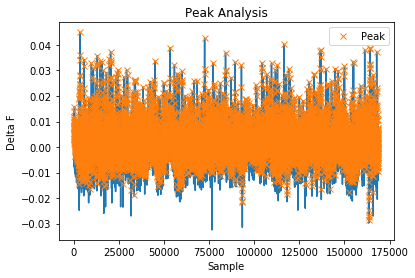

In [ ]:
# First, plot our delta fluorescence
plt.plot(ff_clean)

# Answer
plt.plot(indices, ff_peak, "x", label="Peak")
plt.title('Peak Analysis')
plt.xlabel('Sample')
plt.ylabel('Delta F')
plt.legend(loc="upper right")

<a id="d6c1e911-21a8-48b9-866a-af49c431501b"></a>
### Exercise 16
<a href="#Overview">Return to overview</a>
Ya, no way there are that many GCaMP related peaks. You know what would be great? If we could use some kind of minimum peak amplitude to determine if something is a peak. 

Let's do something backed with statistics and use a threshold of 1.96 standard deviations above the mean in `ff_clean` to count a peak as a peak. Specify a variable called `minamp` that defines the minimum threshold for the peak amplitude. Does Numpy have some functions that can help calculate the mean and standard deviation of an array? Since `ff_clean` is a 1D array, you don't need to worry about axis arguments. If you do it right, `minamp` will be ~0.014.

In [ ]:
# Answer
minamp = np.mean(ff_clean) + np.std(ff_clean) * 1.96
minamp

Then find the correct parameter `find_peaks` to specify the peak threshold we calculated in `minamp` and plot the new peaks on top of `ff_clean.` Save the resulting peak indices as `pos_indices`.

In [ ]:
# Answer
pos_indices, _ = scipy.signal.find_peaks(ff_clean, height=minamp)

#plot it
plt.plot(ff_clean)
plt.plot(pos_indices, ff_clean[pos_indices], "x",label="Peak")
plt.title('Peak Analysis - 1.96 STDevs')
plt.xlabel('Sample')
plt.ylabel('Delta F')
plt.legend(loc='upper right')

<a id="502e77bc-af04-40e6-a278-0a55798f0fb2"></a>
### Exercise 17
<a href="#Overview">Return to overview</a>

Nice! One thing you may notice is that we are only pulling out the positive peaks. Maybe we care about negative peaks too. Whatever they may mean. 

Lets run another peak analysis to find negative peaks using the same thresehold (mean * 1.96 std). Save this as `neg_indices`. How might we do this? What if we simply invert the `ff_clean` array so positive values are negative?

Plot the positive and negative peaks on the same graph.

In [ ]:
# Answer
neg_indices, _ = scipy.signal.find_peaks(-ff_clean, height=minamp) 

#plot
plt.plot(ff_clean)
plt.plot(pos_indices, ff_clean[pos_indices],"x",label = "Pos Peak")
plt.plot(neg_indices, ff_clean[neg_indices],"o",color='g',label="Neg Peak")
plt.title('Peak Analysis - 1.96 STDevs')
plt.xlabel('Sample')
plt.ylabel('Delta F')
plt.legend(loc='upper right')

One more thing... Say we know GCaMP has a decay of 1 second for an action potential. I.e. spikes should be at least one second apart. Lets redo our peaks analysis one more time with this criteria.  Given our sampling rate for the downsample data, how many samples does 1 second translate to? What is a parameter in `find_peaks` that might allow us to specify that peaks can't be closer than that number of samples?

Try it. Calculate both `pos_indices` and `neg_indices` and plot the results.

In [ ]:
# Answer
pos_indices, _ = scipy.signal.find_peaks(ff_clean, height=minamp, distance=63)
neg_indices, _ = scipy.signal.find_peaks(-ff_clean, height=minamp, distance=63)

#plot
plt.plot(ff_clean)
plt.plot(pos_indices, ff_clean[pos_indices],"x", label = "Pos Peaks")
plt.plot(neg_indices, ff_clean[neg_indices],"o",color='g',label="Neg Peaks")
plt.title('Peak Analysis - 1.96 STDevs - One Second')
plt.xlabel('Sample')
plt.ylabel('Delta F')
plt.legend(loc='upper right')

We've been ignoring the second value returned by `find_peaks`. Let's go back and take a look at it.

In [ ]:
pos_indices, pos_info = scipy.signal.find_peaks(ff_clean, height=minamp, distance=63)
neg_indices, neg_info = scipy.signal.find_peaks(-ff_clean, height=minamp, distance=63)
pos_info

Looks like the second argument gives you some information about the peaks. In this case it's a dictionary with a single key, `peak_heights`.

<a id="6b89bd70-f62b-466c-a761-6eb3570d321e"></a>
## Writing Out Our Data
<a href="#Overview">Return to overview</a>


<a id="161b7456-37ee-4195-bdc7-addaae4713d9"></a>
### Exercise 18
<a href="#Overview">Return to overview</a>
Alright lets write out some metrics using the csv package. We want a few things:
1. Number of positive peaks
2. Number of negative peaks
3. Total number of peaks (positive + negative)
4. Mean amplitude of positive peaks
5. Mean amplitude of negative peaks

Use `pos_info` and `neg_info` to calculate this. Once you're done, assemble these five numbers into a list called `peakmetrics`. Printing the list should give you:

    [384, 203, 587, 0.021044007973008167, 0.01714476874657893]

In [ ]:
# Answer
pos_heights = pos_info['peak_heights']
neg_heights = neg_info['peak_heights']
n_pos = len(pos_heights)
n_neg = len(neg_heights)
n_total = n_pos + n_neg

mean_pos_height = np.mean(pos_heights)
mean_neg_height = np.mean(neg_heights)

peakmetrics = [
    n_pos,
    n_neg,
    n_total,
    mean_pos_height,
    mean_neg_height,
]
print(peakmetrics)

<a id="0d8e3f87-8108-4d13-a0f1-c4262395ca81"></a>
### Exercise 19
<a href="#Overview">Return to overview</a>

Let's use the csv module to write this list out to a csv file. While this is a bit of overkill for one row of data, one could imagine this would be useful if we had alot of metrics or if we automated this analysis to go thorugh multiple data files at once. 

For this we will use the `csv` module. Take a look at the documentation https://docs.python.org/3/library/csv.html#writer-objects

Make a csv file named `Peak_Analysis`. Write out our `peakmetrics` list into the file. 

***Bonus:*** Make a header row to specify what each column is. 

In [ ]:
# Answer
with open('Peak_Analysis.csv', 'w') as file:
    wr = csv.writer(file,lineterminator='\n')   
    wr.writerow(peakmetrics)

In [ ]:
# Answer (bonus)
with open('Peak_Analysis.csv', 'w') as file:
    wr=csv.writer(file,lineterminator='\n')
    wr.writerow(['Pos Peaks', 'Neg Peaks','Total Peaks','Pos Avg', 'Neg Avg'])        
    wr.writerow(peakmetrics)